# Mohammad Amin Roohi     42015453
# Wenqing(Grace) Gu              37336435
# Nicholas Pun     27872167
# Zhicong Qi    15457369 

## Computational Optimization (CPSC 406)
> In class activity 

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Question 1

In [2]:
data = scipy.io.loadmat('mnist.mat')
trainX = data['trainX']
trainY = data['trainY']
testX = data['testX']
testY = data['testY']

In [3]:
i = 1
img = trainX[i,:].reshape(28, 28)

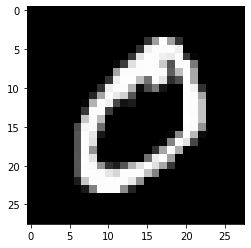

In [4]:
plt.gray()
plt.imshow(img)

# Question 2 a)

In [5]:
idx4 = (trainY == 4)
idx9 = (trainY == 9)
idx = idx4 + idx9
idx = idx.reshape(-1)
A = trainX[idx]
b = trainY.reshape(-1)[idx]
A = A.astype(int)
b = b.astype(int)

# Question 2  b)

In [6]:
idx4_b = (b == 4)
idx9_b = (b == 9)
b[idx4_b] = 1
b[idx9_b] = -1

# Question 2  c)

In [7]:
Amean = A.mean(axis = 0)
A = A - Amean

In [8]:
Astd = A.std(axis = 0)
A = A / ((Astd > 1).astype(int)*Astd + (Astd <= 1).astype(int)*np.ones(A.shape[1]))

<p> We know that for normalizing a vector like $x$, we have:
    $$x_n = \frac{x - \mu}{\sigma},$$
    where $\mu$ is the mean of $x$ and $\sigma$ is the standard deviation of $x$. Here, for each vector, if the corresponding standard deviation is less than 1, we substitute that by 1. Note that if we first remove the variance, the mean of new data will turn into $\frac{\mu}{\sigma}$ and to remove the meant at in this case, we need to use $\frac{\mu}{\sigma}$ instead of $\mu$.

# Question 3  a)

In [9]:
x_ls = np.linalg.lstsq(A, b, rcond=None)[0]
loss = mean_squared_error(A@x_ls, b)*A.shape[0]
print('loss_xls = ', loss)

loss_xls =  2136.2898686264034


# Question 3  b)

<p> To build a classifier, here with 2 classes, we need a function, say $f$, such that if $x \in Class(A)$, then return a value around $a_1$, or $f(x) \approx a_1$ and if $x \in Class(B)$, then return a value around $a_2$ or $f(x) \approx a_2$, where $a_1$ and $a_2$ are two different value. Then we can assume that if $f(x_0) > \frac{a_1 + a_2}{2}$, then $x_0 \in Class(A)$ and if $f(x_0) < \frac{a_1 + a_2}{2}$, then $x_0 \in Class(B)$. Here let's assume $f(x) = sign(xW)$, where $W$ is the weights vector, and is returned by the least squares problem. 

In [10]:
C_xls = np.sign(A@x_ls)
train_misclass_rate = sum((C_xls != b).astype(int))/A.shape[0]
print('train misclass rate = ', train_misclass_rate)

train misclass rate =  0.030786192858960223


# Question 3  c)

In [11]:
idx4_test = (testY == 4)
idx9_test = (testY == 9)
idx_test = idx4_test + idx9_test
idx_test = idx_test.reshape(-1)
Atest = testX[idx_test]
btest = testY.reshape(-1)[idx_test]
Atest = Atest.astype(int)
btest = btest.astype(int)

idx4_b_test = (btest == 4)
idx9_b_test = (btest == 9)
btest[idx4_b_test] = 1
btest[idx9_b_test] = -1

Atest = Atest - Amean
Atest = Atest / ((Astd > 1).astype(int)*Astd + (Astd <= 1).astype(int)*np.ones(A.shape[1]))

<p> Since we want to use our trained model, and it is trained with the normalized data, we need to test it on a data from same distribution. To do this, we assume that all data come from same distribution and normalize the test data with the same statistics of train data.
    
<p> We need to preprocess the testing data in exactly the same way we preprocessed the training data (e.g. remove the same amount of bias and variance) so that we could apply the model that is trained with training data to test data. The training data here (i.e. A) has already been preprocessed (normalized) after we calculate the constants. Hence, if we re-compute Amean and Astd using the code we used before, we would get different answers for the constants, which would not meet our goal to properly preprocess the testing data. Therefore, we assume that all data come from same distribution and normalize the test data with the same constants that we calculated before.

# Question 4  a)
## i)

<p> As a summary, since $\log(x)$ is a strictly increasing function, we have:
    $$argmax(f(x)) = argmax(\log(f(x))$$
    
<p> To prove this, suppose $a_1 = argmax(f(x))$ and $a_2 = argmax(\log(f(x))$, where $a_1 \neq a_2$. Since $\log(x)$ is a strictly increasing function, we can say that $\log(f(a_1)) > \log(f(a_2))$ where is a contradiction with $a_2 = argmax(\log(f(x))$. 

# Question 4  a)
## ii)

$$f(x) = \log\left(\Pi_{i = 1}^{m}\sigma(a_i^Tx)^{b_i}(1 - \sigma(a_i^Tx))^{1 - b_i}\right) = \sum_{i = 1}^{m} \log(\sigma(a_i^Tx)^{b_i}(1 - \sigma(a_i^Tx))^{1 - b_i})$$
<p> This tells us:
$$f(x) = \sum_{i = 1}^{m}b_i \log(\sigma(a_i^Tx)) + (1 - b_i) \log(1 - \sigma(a_i^Tx))$$
    
<p> For the gradient we have:
    $$\frac{\partial}{\partial x_j} = a_j \sum_{i = 1}^{m} \frac{b_i e^{-a_i^Tx}}{(1 + e^{-a_i^Tx})^2} \times (1 + e^{-a_i^Tx})^2 + (1 - b_i)(\frac{-e^{-a_ix}(1 + e^{-a_ix}) + e^{-2a_i^Tx}}{(1 + a^{-a_i^Tx})^2})\times \frac{1 + e^{-a_i^T}}{e^{-a_i^Tx}}$$
    
$$\implies \frac{\partial}{\partial x_j} = \sum_{i = 1}^{m} (b_i - \sigma(a_i^Tx))x_j$$    
    <p> So, we can say the gradient is:
        $$\nabla f(x) = \begin{bmatrix}
    \sum_{i = 1}^{m} (b_i - \sigma(a_i^Tx))a_i^{(1)}\\
    .\\
    .\\
    .\\
    \sum_{i = 1}^{m} (b_i - \sigma(a_i^Tx))a_i^{(n)}
    \end{bmatrix}$$  
    <p>Based on what we calculate for the gradient, we can say:
        $$H_{ii} = \sum_{i = 1}^{m}(b_i - \sigma(a_i^Tx)) + a_ix_i \sum_{i = 1}^{m} (1 - \sigma(a_i^Tx))$$
    <p> And for $H_{ij}$ where $i \neq j$, we have:
    $$H_{ij} = a_jx_i \sum_{i = 1}^{m} (1 - \sigma(a_i^Tx))$$
        

<p> We can show that:
    $$
\triangledown_x^2 L = A^T W A,
$$

where:
    $$W = 
    \begin{bmatrix} 
    \sigma_1(1-\sigma_1) & 0 & \dots & 0 \\
    0 & \sigma_2(1-\sigma_2)  & \dots & 0 \\
    \vdots & \ddots & \vdots & \vdots \\
    0 & 0 & \dots & \sigma_m(1-\sigma_m) \\
    \end{bmatrix}
    \in \mathbb{R}^{m \times m},$$
    
and,
    $$A =
    \begin{bmatrix} 
    a_{11} & a_{12} & \dots & a_{1n} \\
    \vdots & \ddots & \vdots & \vdots \\
    a_{m1} & a_{m2} & \dots & a_{mn} \\
    \end{bmatrix}
    \in \mathbb{R}^{m \times n}.$$

## We can also solve the problem using this approach

### Part 0: Some calculation and simplification for sigmond function $\sigma(a_i^Tx)$

Let $\sigma(a_i^Tx) = \sigma_i$, and some important calculation of $\sigma(a_i^Tx) = \sigma_i = \frac{1}{1+e^{-a_i^Tx}}$:

$$\sigma_i = \frac{1}{1+e^{-a_i^Tx}} = \frac{e^{a_i^Tx}}{1+e^{a_i^Tx}}$$

$$1-\sigma_i = 1 - \frac{e^{a_i^Tx}}{1+e^{a_i^Tx}} = \frac{1}{1+e^{a_i^Tx}}$$

$$\log \sigma_i = \log \frac{e^{a_i^Tx}}{1+e^{a_i^Tx}} = \log(e^{a_i^Tx})-\log(1+e^{a_i^Tx}) = a_i^Tx-\log(1+e^{a_i^Tx})$$

$$\log (1-\sigma_i) = \log \frac{1}{1+e^{a_i^Tx}} = 0-\log(1+e^{a_i^Tx}) = -\log(1+e^{a_i^Tx})$$

### Part 1: simplify log likelihood $f(x)$

\begin{aligned}
f(x) &= \log \left( \Pi_{i=1}^{\infty} \sigma_i^{b_i} (1-\sigma_i)^{1-b_i} \right)\\
     &= \sum_{i=1}^{m} b_i \log(\sigma_i) + (1-b_i) \log(1-\sigma_i)) \\
     &= \sum_{i=1}^{m} b_i (a_i^Tx-\log(1+e^{a_i^Tx})) + (1-b_i) (-\log(1+e^{a_i^Tx})) \\
     &= \sum_{i=1}^{m} b_i a_i^Tx - b_i \log(1+e^{a_i^Tx}) - \log(1+e^{a_i^Tx}) + b_i \log(1+e^{a_i^Tx}) \\
     &= \sum_{i=1}^{m} a_i^Tx b_i - \log(1+e^{a_i^Tx}) \\
     &= \sum_{i=1}^{m} a_i^Tx b_i + \log(\frac{1}{1+e^{a_i^Tx}}) \\
     &= \sum_{i=1}^{m} a_i^Tx b_i + \log(1-\sigma_i) \\
\end{aligned}

### Part 2: the loss function $L(x)$

\begin{aligned}
L(x) &= -f(x) \\
     &= \sum_{i=1}^{m} - a_i^Tx b_i + \log(1+e^{a_i^Tx}) \\
     &= \sum_{i=1}^{m} - a_i^Tx b_i - \log(1-\sigma_i) \\
     &=  - (Ax)^T b - \sum_{i=1}^{m} \log(1-\sigma_i) \\
\end{aligned}

### Part 3: the gradient $\triangledown L(x)$

\begin{aligned}
\frac{d}{dx_j} L 
    &= \frac{d}{dx_j} \sum_{i=1}^m - a_i^Tx b_i + \log(1+e^{a_i^Tx}) \\
    &= \sum_{i=1}^m - a_{ij}b_i + \frac{a_{ij} \cdotp e^{a_i^Tx}}{1+e^{a_i^Tx}} \\
    &= \sum_{i=1}^m a_{ij} (\frac{e^{a_i^Tx}}{1+e^{a_i^Tx}} - b_i) \\
    &= \sum_{i=1}^m a_{ij} (\sigma_i - b_i) \\
\end{aligned}

Hence:
$$
\triangledown_x L = A^T (\sigma(Ax) - b)
$$

where $x \in \mathbb{R}^{n \times 1}$, $b \in \mathbb{R}^{m \times 1}$, and 

$$\begin{equation*}
    A = 
    \begin{bmatrix} 
    a_{1}\\
    \vdots \\
    a_{m}\\
    \end{bmatrix} =
    \begin{bmatrix} 
    a_{11} & a_{12} & \dots & a_{1n} \\
    \vdots & \ddots & \vdots & \vdots \\
    a_{m1} & a_{m2} & \dots & a_{mn} \\
    \end{bmatrix}
    \in \mathbb{R}^{m \times n}
\end{equation*}$$

$$\begin{equation*}
    \sigma(Ax) =
    \begin{bmatrix} 
    \sigma_{1} \\
    \vdots  \\
    \sigma_{m} \\
    \end{bmatrix} = 
    \begin{bmatrix} 
    \sigma(a_1^Tx) \\
    \vdots  \\
    \sigma(a_m^Tx) \\
    \end{bmatrix}
    \in \mathbb{R}^{m \times 1}
\end{equation*}$$

### Part 4: the hessian $\triangledown^2 L(x)$ 

 
\begin{aligned}
\frac{d^2}{dx_j dx_k} L 
    &= \frac{d}{dx_k} \sum_{i=1}^m a_{ij} (\sigma_i - b_i) \\
    &= \sum_{i=1}^m a_{ij} \frac{d}{dx_k} (\sigma_i - b_i) \\
    &= \sum_{i=1}^m a_{ij} \frac{d}{dx_k} (\sigma_i) \\
    &= \sum_{i=1}^m a_{ij} \frac{d}{dx_k} (\frac{1}{1+e^{-a_i^Tx}}) \\
    &= \sum_{i=1}^m a_{ij} \cdotp (-1) \cdotp \frac{1}{(1+e^{-a_i^Tx})^2} \cdotp e^{-a_i^Tx} \cdotp {-a_{ik}} \\
    &= \sum_{i=1}^m a_{ij} {a_{ik}}  \cdotp \sigma_i \cdotp \frac{e^{-a_i^Tx}}{(1+e^{-a_i^Tx})} \\
    &= \sum_{i=1}^m a_{ij} \cdotp \sigma_i \cdotp (1-\sigma_i) \cdotp  {a_{ik}}
\end{aligned}
​
Hence:
$$
\triangledown_x^2 L = A^T W A
$$
where W is a diagonal matrix
$$\begin{equation*}
    W =
    \begin{bmatrix} 
    \sigma_1(1-\sigma_1) & 0 & \dots & 0 \\
    0 & \sigma_2(1-\sigma_2)  & \dots & 0 \\
    \vdots & \ddots & \vdots & \vdots \\
    0 & 0 & \dots & \sigma_m(1-\sigma_m) \\
    \end{bmatrix}
    \in \mathbb{R}^{m \times m}
\end{equation*}$$


### Part 5: check for convexity

$\because$ For $\sigma_i = \sigma(a_i^Tx) = \sigma(s) = \frac{1}{1+e^{-s}}$, $1+e^{-s} > 0$ for any $s \in \mathbb{R}$

$\therefore$ $\sigma_i > 0$

$\therefore$ With similar reasonings, $1-\sigma_i = \frac{e^{-s}}{1+e^{-s}} > 0$

$\therefore$ The diagonal terms of $W$: $\sigma_i (1-\sigma_i)$ are all real positive numbers

$\therefore$ The diagonal terms of $W^{\frac{1}{2}}$: $\sqrt{\sigma_i (1-\sigma_i)}$ are also all real positive numbers

$\therefore$ For the hessian of our loss function:

\begin{aligned}
\triangledown_x^2 L 
    &= A^T W A \\
    &= A^T W^{\frac{1}{2}} W^{\frac{1}{2}} A \\
    &= (W^{\frac{1}{2}} A)^T W^{\frac{1}{2}} A \\
    &= || W^{\frac{1}{2}} A||_ 2^2 \\
    &\geq 0
\end{aligned}

$\therefore$ The Hessian $\triangledown_x^2 L$ is positive semidefinite

$\therefore$ The loss function $L$ is convex.

# Question 4  b)
## i)

In [12]:
b_logistic = (b+1)/2

# Question 4  b)
## ii)

In [13]:
x = np.zeros([1001, A.shape[1]])

def gradient(x):
    grad = np.zeros(A.shape[1])
    for i in range(A.shape[0]):
        k = b_logistic[i] - 1/(1+np.exp(-np.dot(A[i], x)))
        grad += k*A[i]

    return grad

eta = 1/A.shape[0]
for i in range(1, 1001):
    x[i] = x[i-1] + eta*gradient(x[i-1])
        
 

In [16]:
def f(x):
    out = 0
    for i in range(A.shape[0]):
        out += b_logistic[i]*np.log(1/(1 + np.exp(-np.dot(A[i], x)))) + (1 - b_logistic[i])*np.log(1 - 1/(1 + np.exp(-np.dot(A[i], x))))
    
    return out
    

In [17]:
model_loss = []
model_loss_LL = []

for i in range(1001):
    C = (np.sign(1/(1 + np.exp(-A@x[i])) - 0.5) + 1)/2
    train_misclass_rate_i = sum((C != b_logistic).astype(int))/A.shape[0]
    model_loss.append(train_misclass_rate_i)
    model_loss_LL.append(-f(x[i]))
    


C:\Users\nickb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\nickb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


Text(0.5, 0, 'iteration')

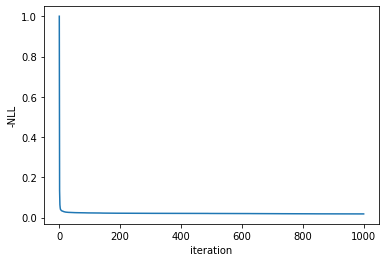

In [18]:
plt.plot(model_loss)
plt.ylabel('-NLL')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

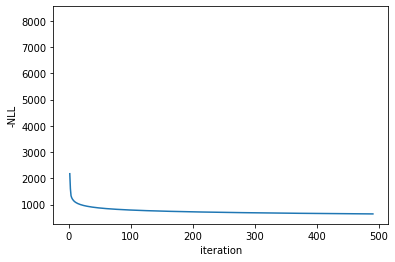

In [19]:
plt.plot(model_loss_LL)
plt.ylabel('-NLL')
plt.xlabel('iteration')

In [20]:
btest_logistic = (btest + 1)/2
C_test = (np.sign(1/(1 + np.exp(-Atest@x[-1])) - 0.5) + 1)/2
test_misclass_rate = sum((C_test != btest_logistic).astype(int))/Atest.shape[0]
print('The train misclassification rate is: ', model_loss[-1])
print('The test misclassification rate is: ', test_misclass_rate)

The train misclassification rate is:  0.018403867356458315
The test misclassification rate is:  0.030135610246107485


# Question 4  b)
## iii)

In [21]:
def back_track_stepsize(s , alpha, beta, t_k, x):
    while f(x) - f(x + 1*t_k*gradient(x)) < alpha*t_k*np.linalg.norm(gradient(x))**2:
        t_k = t_k*beta
    return t_k

In [22]:
x_backtrack = np.zeros([1001, A.shape[1]])
for i in range(1, 1001):
    alpha = back_track_stepsize(1, 0.5, 0.5, 1, x_backtrack[i-1])
    x_backtrack[i] = x_backtrack[i-1] + alpha*gradient(x_backtrack[i-1])


C:\Users\nickb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\nickb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


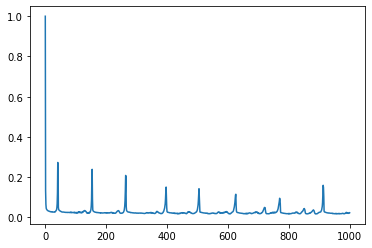

In [23]:
model_loss_backtracking = []

for i in range(1001):
    C = (np.sign(1/(1 + np.exp(-A@x_backtrack[i])) - 0.5) + 1)/2
    train_misclass_rate_i = sum((C != b_logistic).astype(int))/A.shape[0]
    model_loss_backtracking.append(train_misclass_rate_i)

plt.plot(model_loss_backtracking)

In [24]:
C_test_backtracking = (np.sign(1/(1 + np.exp(-Atest@x_backtrack[-1])) - 0.5) + 1)/2
test_misclass_rate_backtracking = sum((C_test_backtracking != btest_logistic).astype(int))/Atest.shape[0]
print('The train misclassification rate is: ', model_loss_backtracking[-1])
print('The test misclassification rate is: ', test_misclass_rate_backtracking)

The train misclassification rate is:  0.022305147994232888
The test misclassification rate is:  0.03164239075841286


# Question 4  b)
## iv)

<p> We see that in the backtracking approach, for the convergence rate there are some jumps and this approach gives us higher error!
<p> But it seems that the loss function is decreasing more rapidly using the gradient descent with backtracking method, compared with using constant step size gradient descent, after 1000 iterations.

# Question 4  b)
## v)

<p> Here for this example, the logistic regression performance was not much better. But for some applications it may work much better. 

# Question 5

In [25]:
regression_error = []
logistic_error = []

for i in range(A.shape[0]):
    regression_error.append(np.linalg.norm(np.dot(A[i], x_ls) - b)**2)
    logistic_error.append(b_logistic[i]*np.log(1/(1 + np.exp(-np.dot(A[i], x[-1])))) + (1 - b_logistic[i])*np.log(1 - 1/(1 + np.exp(-np.dot(A[i], x[-1])))))


regression_error = np.array(regression_error)   
idx_regression = np.argpartition(regression_error, 3)   
idx_regression = idx_regression[0:3]

logistic_error = -np.array(logistic_error)
idx_logistic = np.argpartition(logistic_error, 3)  
idx_logistic = idx_logistic[0:3]

C:\Users\nickb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\nickb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


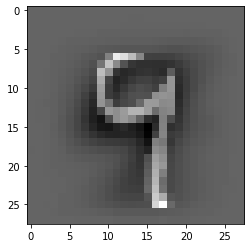

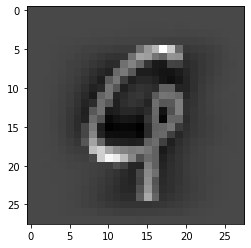

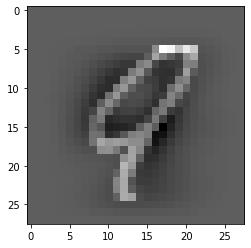

In [26]:
for i in idx_regression:
    img = A[i,:].reshape(28, 28)
    plt.figure()
    plt.imshow(img)

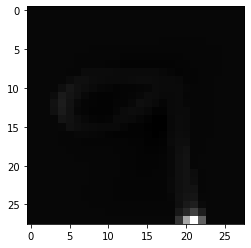

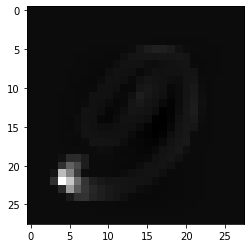

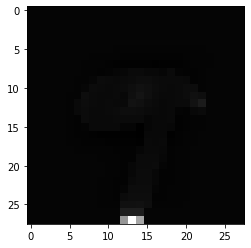

In [27]:
for i in idx_logistic:
    img = A[i,:].reshape(28, 28)
    plt.figure()
    plt.imshow(img)